In [1]:

!pip install numpy
!pip install panda
!pip install matplotlib
!pip install seaborn

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=d7ccdd445e9a63bec796b666be1b5c5c599eb8944a1cd8c07611486729a6e251
  Stored in directory: /root/.cache/pip/wheels/df/5c/39/36f8dae25a1e88d6ec4411dec4a143781e64fdff6897758eec
Successfully built panda


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF


In [4]:
!gdown 1HAZGQeE1SXNyQNer1sWr33mlcX0kS70V

Downloading...
From: https://drive.google.com/uc?id=1HAZGQeE1SXNyQNer1sWr33mlcX0kS70V
To: /content/DA -Task 2..xlsx
100% 50.8k/50.8k [00:00<00:00, 52.7MB/s]


In [7]:
df = pd.read_excel('DA -Task 2..xlsx')
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,13041,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tigh...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,...,22222280KKBP0890,2820784987,4,1,Y,6NJ26,Sport,15.0,1,1
96,1HYKSSRL4SZ003381,13048,replace steering wheel,cs driver assistance warning light is coming o...,2024-02-07,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2822282187,6,1,N,6MB26,NaN,10.0,0,1
97,1HKKNXLS3SZ128369,13044,REPLACE STEERING WHEEL PRA 496735300000,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERIN...,2024-02-07,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Crossover SUV,4 Door Utility,C1UG,...,21222222SKBP0119,2822042248,4,1,N,TNN26,Denali,10.0,0,1
98,1HC4WLE78RF260518,13045,REMOVED STEERING WHEEL AND DISASSEMBLED AND FO...,CUSTOMER STATES THERE IS CLICKING TYPE NOISE C...,2024-02-07,NaN,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCH,...,Y0212811MRFX0180,2820879999,6,1,N,CC20943,2500,14.0,0,1


In [8]:
### 1. Column-Wise Analysis ###
# Get data types, unique values, and missing percentages
column_analysis = pd.DataFrame({
    "Data Type": df.dtypes,
    "Unique Values": df.nunique(),
    "Missing Values": df.isnull().sum(),
    "Missing %": (df.isnull().sum() / len(df)) * 100
}).sort_values(by="Missing Values", ascending=False)
print("Column Analysis:\n", column_analysis)


Column Analysis:
                                     Data Type  Unique Values  Missing Values  \
CAMPAIGN_NBR                          float64              0             100   
ENGINE_TRACE_NBR                       object             88              12   
TRANSMISSION_TRACE_NBR                 object             88              12   
ENGINE_SOURCE_PLANT                    object              9              12   
TRANSMISSION_SOURCE_PLANT             float64              6              12   
OPTN_FAMLY_CERTIFICATION               object              3              10   
TOTALCOST                             float64             94               6   
OPTF_FAMLY_EMISSIOF_SYSTEM             object              8               5   
CAUSAL_PART_NM                         object             18               5   
LAST_KNOWN_DELVRY_TYPE_CD             float64             11               2   
VEH_TEST_GRP                           object             23               2   
STATE                 

In [9]:
### 2. Data Cleaning ###
# Drop columns with 50%+ missing data
df_cleaned = df.drop(columns=column_analysis[column_analysis["Missing %"] >= 50].index)


In [12]:
# Fill missing numerical values with median
num_cols = df_cleaned.select_dtypes(include=["number"]).columns
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())



In [13]:
# Fill missing categorical values with "Unknown"
cat_cols = df_cleaned.select_dtypes(include=["object"]).columns
df_cleaned[cat_cols] = df_cleaned[cat_cols].fillna("Unknown")

In [14]:
# Standardize text format
df_cleaned[cat_cols] = df_cleaned[cat_cols].apply(lambda x: x.str.lower())


In [15]:
# Handle outliers using IQR method
Q1 = df_cleaned[num_cols].quantile(0.25)
Q3 = df_cleaned[num_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_cleaned[~((df_cleaned[num_cols] < lower_bound) | (df_cleaned[num_cols] > upper_bound)).any(axis=1)]


In [16]:
### 3. Identifying Critical Columns ###
# Selecting top 5 insightful columns
critical_columns = ["PLATFORM", "BODY_STYLE", "TOTALCOST", "CUSTOMER_VERBATIM", "REPAIR_DATE"]
print("Selected Critical Columns:", critical_columns)


Selected Critical Columns: ['PLATFORM', 'BODY_STYLE', 'TOTALCOST', 'CUSTOMER_VERBATIM', 'REPAIR_DATE']


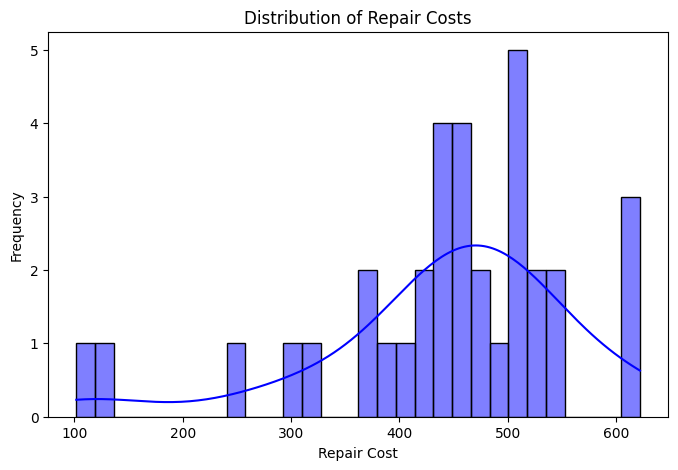

In [17]:
# Visualization 1: Distribution of repair costs
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned["TOTALCOST"], bins=30, kde=True, color='blue')
plt.title("Distribution of Repair Costs")
plt.xlabel("Repair Cost")
plt.ylabel("Frequency")
plt.show()

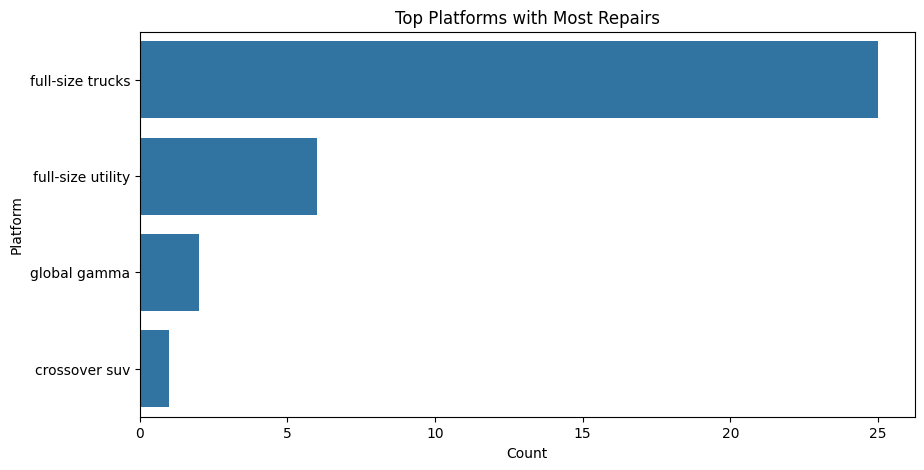

In [18]:
# Visualization 2: Most common platforms for repairs
plt.figure(figsize=(10,5))
sns.countplot(data=df_cleaned, y="PLATFORM", order=df_cleaned["PLATFORM"].value_counts().index)
plt.title("Top Platforms with Most Repairs")
plt.xlabel("Count")
plt.ylabel("Platform")
plt.show()

<ipython-input-19-de023eb6f60d>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_cleaned.resample("M", on="REPAIR_DATE").size().plot(marker="o", color="r")


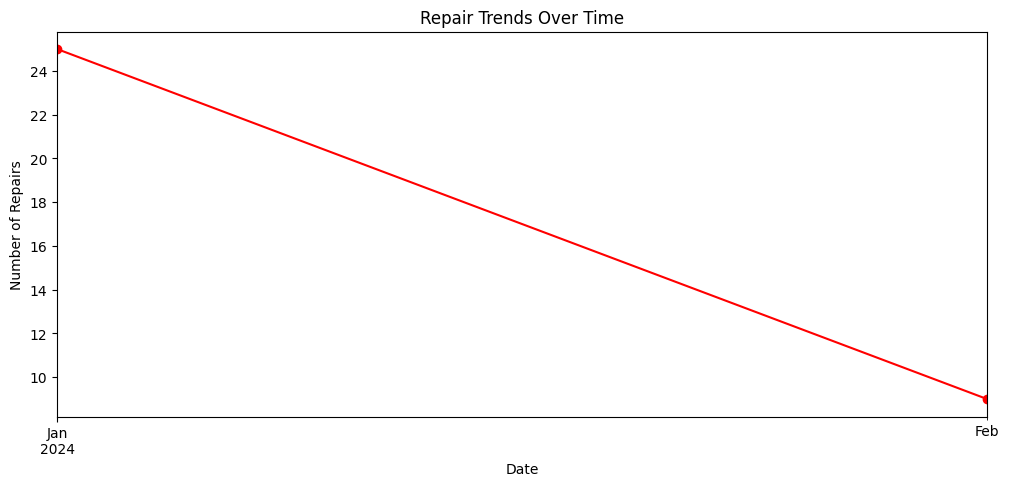

In [19]:
# Visualization 3: Trends over time
plt.figure(figsize=(12,5))
df_cleaned["REPAIR_DATE"] = pd.to_datetime(df_cleaned["REPAIR_DATE"], errors="coerce")
df_cleaned.resample("M", on="REPAIR_DATE").size().plot(marker="o", color="r")
plt.title("Repair Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Repairs")
plt.show()

In [21]:
### 4. Generating Tags from Free Text ###
# Extracting failure components using TF-IDF & NMF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df_cleaned["CUSTOMER_VERBATIM"])
nmf = NMF(n_components=5, random_state=42)
topics = nmf.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [22]:
def get_top_keywords(model, feature_names, n_top_words):
    tags = []
    for topic_idx, topic in enumerate(model.components_):
        tags.append(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    return tags

In [23]:
tags = get_top_keywords(nmf, vectorizer.get_feature_names_out(), 5)
df_cleaned["Generated_Tags"] = [tags[np.argmax(topics[i])] for i in range(len(topics))]


In [25]:
### 5. Export Cleaned Data ###
output_file = "cleaned_task2_data.csv"
df_cleaned.to_csv(output_file, index=False)
print(f"Cleaned data saved as: {output_file}")

Cleaned data saved as: cleaned_task2_data.csv


In [29]:

# Assuming df_cleaned is the cleaned DataFrame
file_path = "cleaned_task2_data.csv"
df_cleaned.to_csv(file_path, index=False)




In [30]:
# Provide download link (for local Jupyter environment)
from google.colab import files
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>